<a href="https://colab.research.google.com/github/mahbubjubayer913/rand_forest/blob/main/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
import pandas as pd
bank_data = pd.read_csv('https://docs.google.com/spreadsheets/d/1HFVcChMX5XMzyX3wQbk95lZ8GFZAGjYeRw1rbGzvf0s/export?format=csv')

bank_data['default'] = bank_data['default'].map({'no':0,'yes':1,'unknown':0})
bank_data['y'] = bank_data['y'].map({'no':0,'yes':1})
bank_data['y'] = bank_data['y'].map({'no':0,'yes':1})

In [ ]:
# Split the data into features (X) and target (y)
X = bank_data.drop('y', axis=1)
y = bank_data['y']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


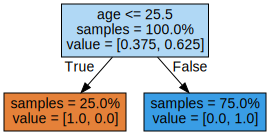

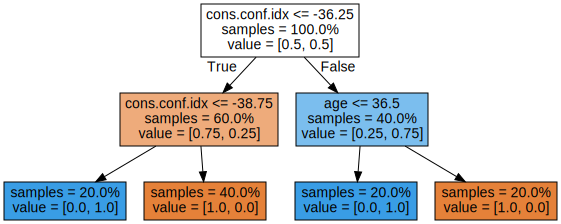

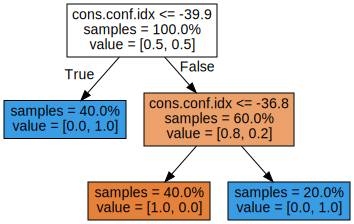

In [ ]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier

# Define the parameter distribution
param_dist = {'n_estimators': randint(50, 500),
              'max_depth': randint(1, 20)}

# Create a random forest classifier
rf = RandomForestClassifier()



In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
# Perform randomized search
skf = StratifiedKFold(n_splits=3)
rand_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=skf, random_state=42, n_jobs=-1)
rand_search.fit(X_train, y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_
print('Best hyperparameters:', rand_search.best_params_)

Best hyperparameters: {'max_depth': 7, 'n_estimators': 485}


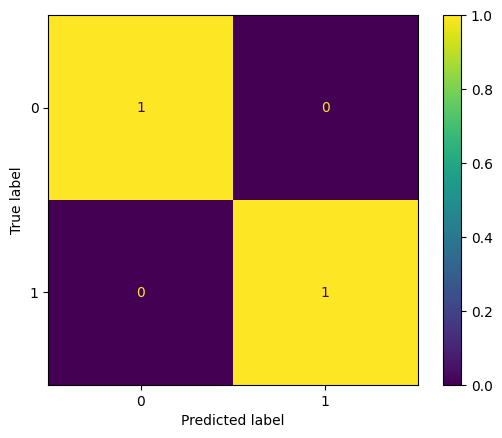

In [ ]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# Import the necessary library
from sklearn.neighbors import KNeighborsClassifier

# Create a KNeighborsClassifier object
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Fit the model to your training data
knn.fit(X_train, y_train)  # Assuming you have X_train and y_train defined

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.5
Precision: 0.5
Recall: 1.0


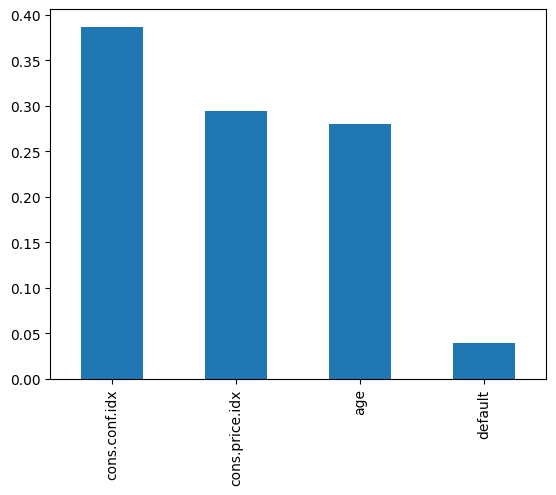

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();